- Regression models can't use accuracy, precision, and recall as scoring functions
### Scoring functions for Regression models
1. mean_squared_error
    - most commonly used error metric for regression problems
    - measure squared error between predicted and true target value for every data point and take average
2. explained_variance_score
    - measure to what degree a model can explain variation or dispersion of the test data
    - measured using correlation coefficient
3. r2_score
    - aka coefficient of determination
    - closely related to explained_variance_score
    - uses an unbiased variance estimation

#### Import libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

#### Create another mock dataset

In [3]:
x = np.linspace(0, 10, 100)

Generating with linspace usually has a lot of noise. Add some noise to target values y_true as well by adding noise to sin function

In [4]:
y_true = np.sin(x) + np.random.rand(x.size) - 0.5

Assume model was smart enough to figure out sin(x) relationship

In [6]:
y_pred = np.sin(x)

Plot data

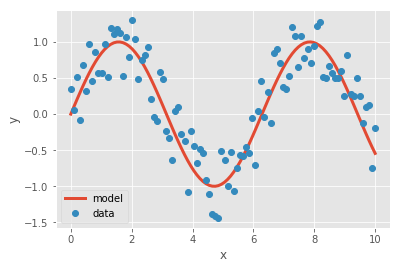

In [25]:
plt.style.use('ggplot')
plt.plot(x, y_pred, linewidth=3, label='model')
plt.plot(x, y_true, 'o', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')

#### Computing error
Most straightforward way of computing error is mean squared error. For each data point, calculate difference between true value and predicted value, then square it. Then we compute avg of squared error over all data points

In [18]:
mse = np.mean((y_pred - y_true) ** 2)
print('Mean squared error = ', mse)

Mean squared error =  0.0882301133269


Test our mse against scikit's implementation

In [26]:
print(metrics.mean_squared_error(y_true, y_pred))

0.0882301133269


#### Compute variance
Square of the difference between each data point and the mean of all the data points

In [32]:
var_y_true = np.mean((np.mean(y_true) - y_true) ** 2)
var_y_pred = np.mean((np.mean(y_pred) - y_pred) ** 2)
print('Variance of y_true = ', var_y_true)
print('Variance of y_pred = ', var_y_pred)

Variance of y_true =  0.468320742993
Variance of y_pred =  0.441851116064


**fraction of variance unexplained**: variance that still exists between predicted and actual labels; variance our predictions could not explain

In [35]:
fvu = np.var(y_true - y_pred) / np.var(y_true)
print('Fraction of variance unexplained = ', fvu)
print('Fraction of variance explained = ', 1 - fvu)

Fraction of variance unexplained =  0.186374178888
Fraction of variance explained =  0.813625821112


Verify fvu with scikit

In [37]:
print(metrics.explained_variance_score(y_true, y_pred))

0.813625821112


#### Calculate coefficient of determination (R^2)
- Compares mean squared error with actual variance in the data
- Better our predictions fit the data, close R^2 will be to 1

In [ ]:
r2 = 1.0 - mse / np.var(y_true)